# Libiraries

In [239]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Fetch Dataset

In [240]:
#Install ucimlrepo
!pip install ucimlrepo

In [241]:
#import the data from UCI
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [242]:
df = X.join([y.reset_index(drop=True)])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Missing Values

In [243]:
#Calculate Rm for each column
def missing_values_rm(df):
  rm = []
  missing_values_column = []
  columns_names = df.columns
  for column in columns_names:
    rm_column = df[column].isnull().sum() / len(df)
    rm.append(int(rm_column))
    if rm_column != 0:
      missing_values_column.append(column)
  if len(missing_values_column) == 0:
    status = "No missing values. You don't need to deal with missing values."
  else:
    status = f"Missing values exist in clumns {missing_values_column}. You need to deal with missing values."
  rm_dataframe = pd.DataFrame([rm], columns = columns_names)
  print(rm_dataframe)
  print(status)
  return missing_values_column
missing_values_rm(df)

   Administrative  Administrative_Duration  Informational  \
0               0                        0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                       0               0                        0   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0            0          0           0           0      0                 0   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        0       0            0            0        0        0  
No missing values. You don't need to deal with missing values.


[]

# Encode Object Features

In [244]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])
df

/tmp/ipykernel_32/1539703795.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
/tmp/ipykernel_32/1539703795.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
/tmp/ipykernel_32/1539703795.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
/tmp/ipykernel_32/1539703795.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
/tmp/ipykernel_32/1539703795.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,0,0,0,0,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,1,1,0,1,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,3,0,8,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,2,1,1,3,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,2,2,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,3,5,0,0,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,2,1,0,7,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,2,1,0,12,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,1,1,2,10,2,0,0


# Scale Features

In [245]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.000000,0.0,0.0,0.003226,0.000000,1.000000,1.000000,0.000000,0.0,0.222222,0.000000,0.000000,0.000,0.000000,1.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.006452,0.001000,0.000000,0.500000,0.000000,0.0,0.222222,0.142857,0.083333,0.000,0.052632,1.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.003226,0.000000,1.000000,1.000000,0.000000,0.0,0.222222,0.428571,0.000000,1.000,0.105263,1.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.006452,0.000042,0.250000,0.700000,0.000000,0.0,0.222222,0.285714,0.083333,0.125,0.157895,1.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.032258,0.009809,0.100000,0.250000,0.000000,0.0,0.222222,0.285714,0.166667,0.000,0.157895,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.115385,0.042663,0.0,0.0,0.170968,0.027883,0.035714,0.145153,0.033839,0.0,0.111111,0.428571,0.416667,0.000,0.000000,1.0,1.0,0.0
12326,0.000000,0.000000,0.0,0.0,0.016129,0.007280,0.000000,0.106667,0.000000,0.0,0.777778,0.285714,0.083333,0.000,0.368421,1.0,1.0,0.0
12327,0.000000,0.000000,0.0,0.0,0.019355,0.002880,0.416667,0.433333,0.000000,0.0,0.777778,0.285714,0.083333,0.000,0.631579,1.0,1.0,0.0
12328,0.153846,0.022067,0.0,0.0,0.048387,0.005408,0.000000,0.105263,0.000000,0.0,0.777778,0.142857,0.083333,0.250,0.526316,1.0,0.0,0.0


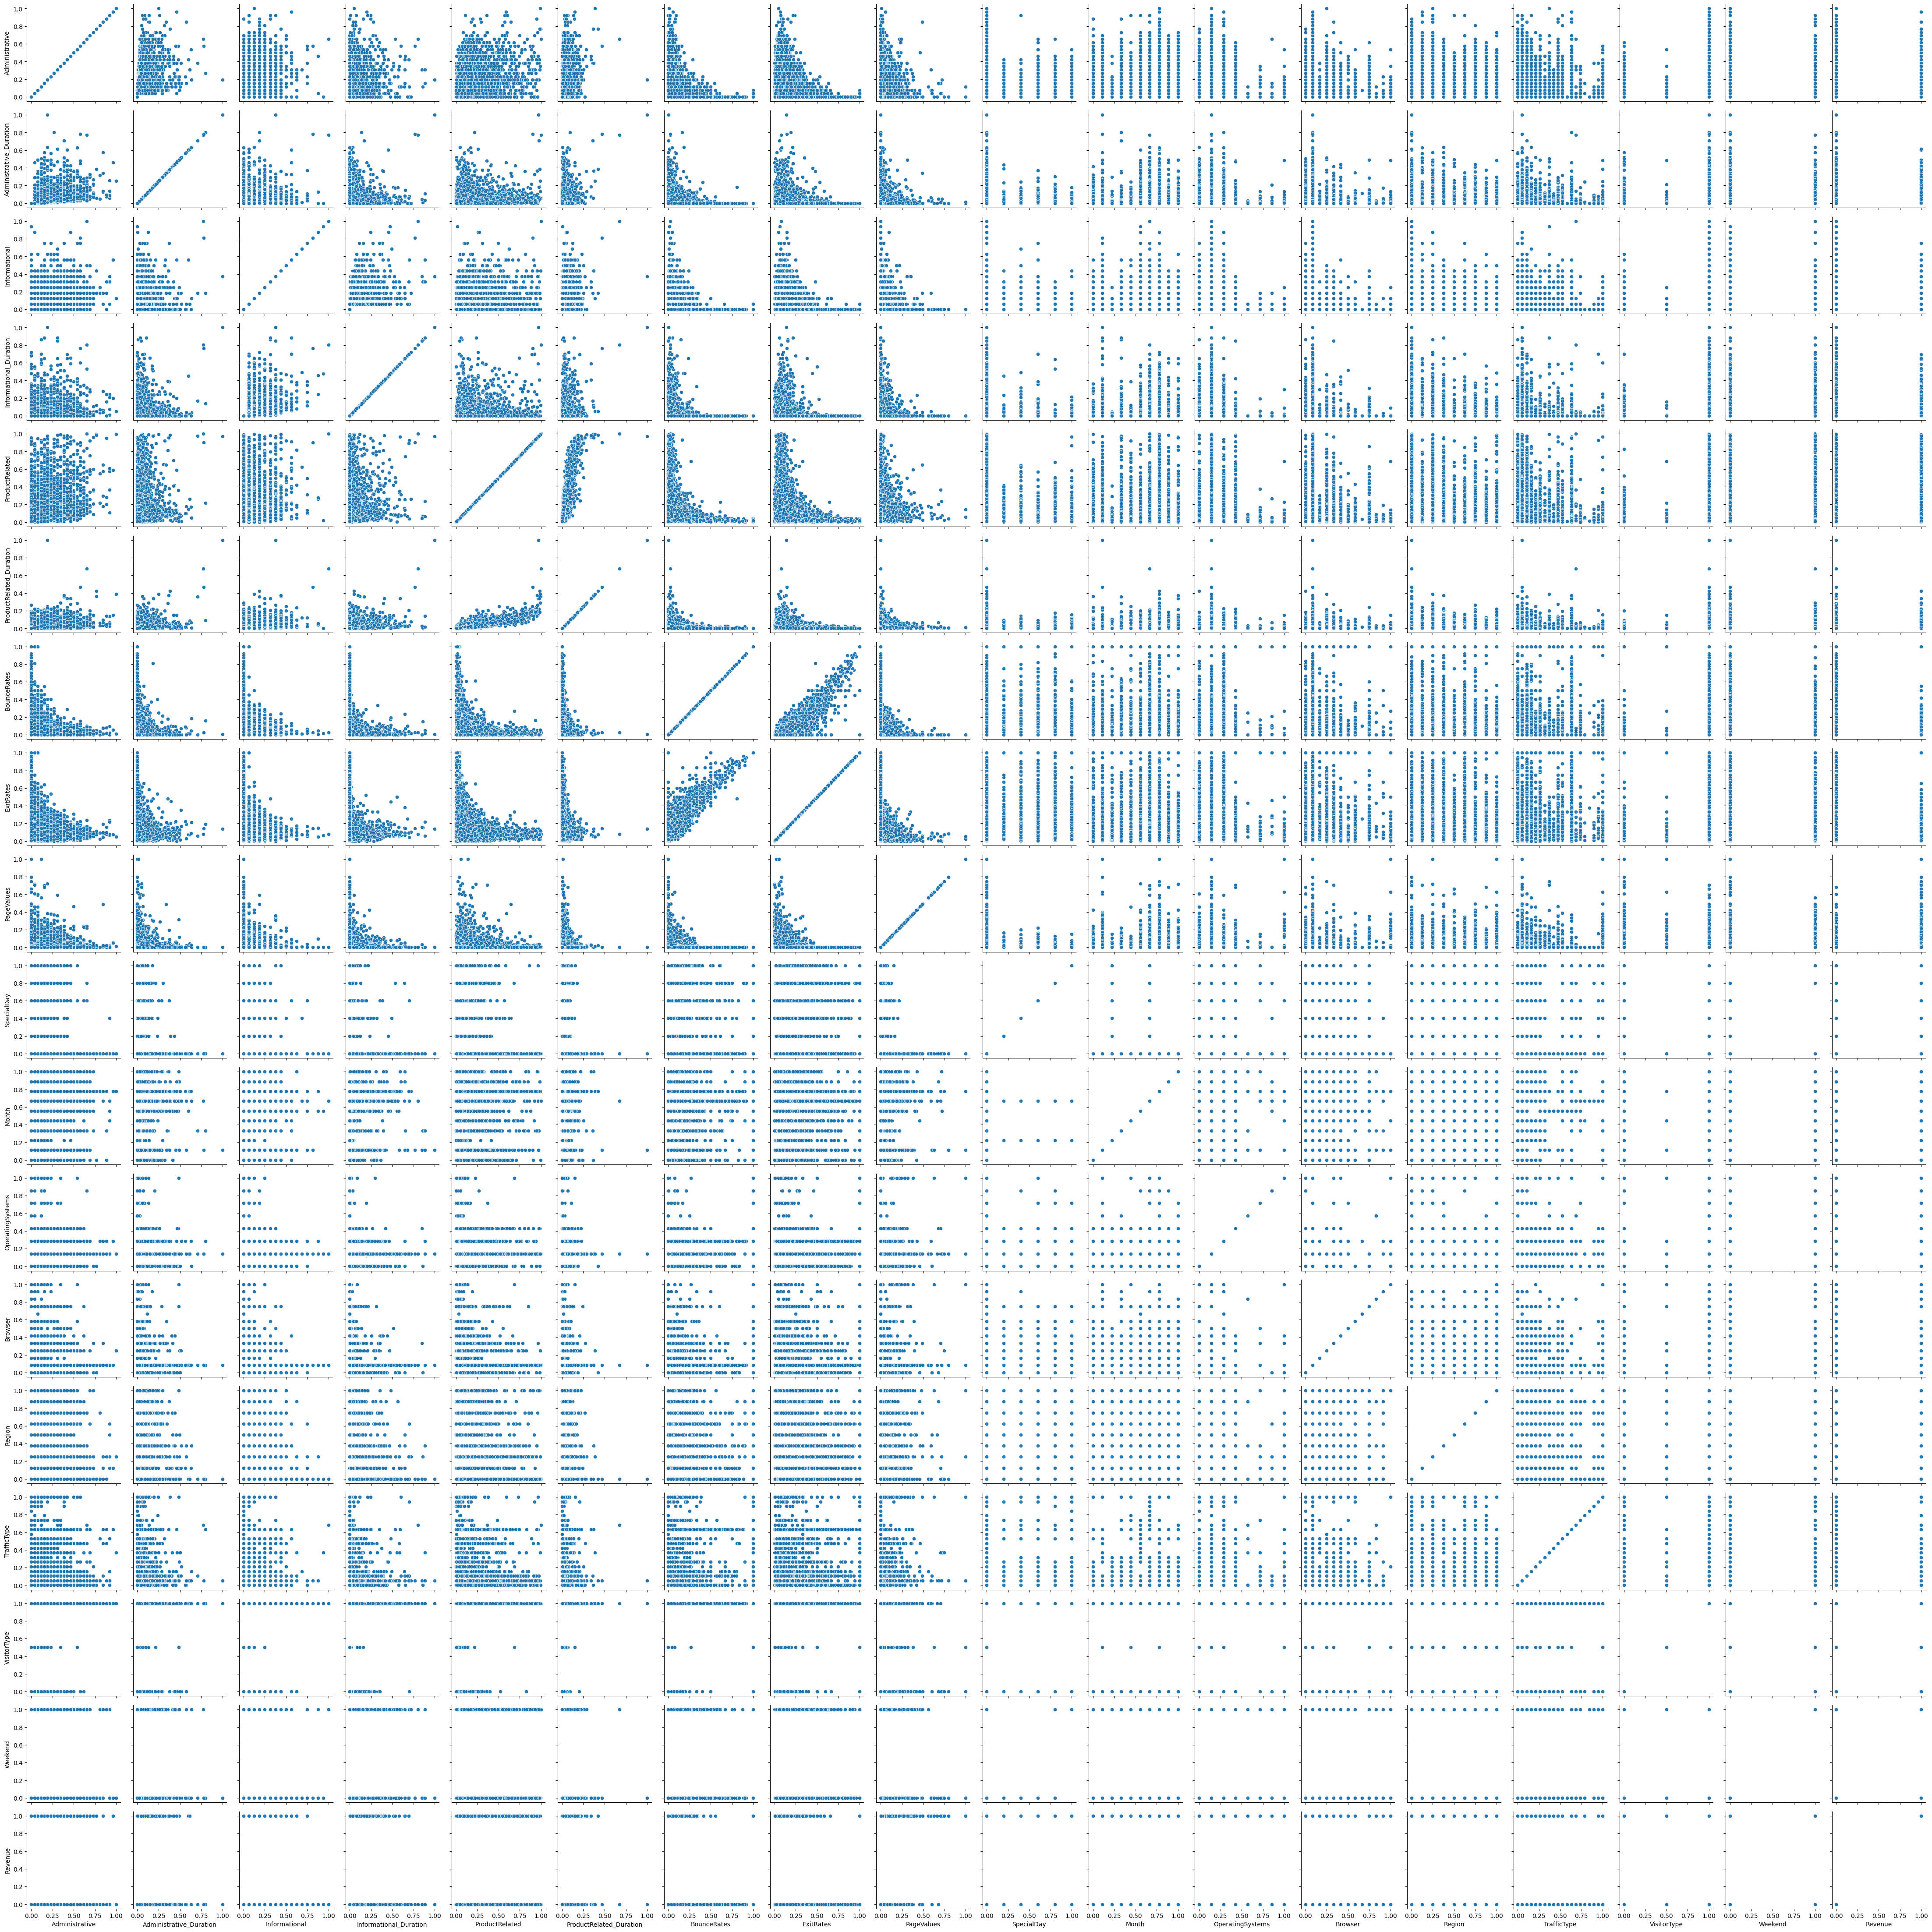

In [246]:
# Visualize the correlation of the data
g = sns.PairGrid(df)
g.map(sns.scatterplot);

# Prepare Data

In [286]:
from sklearn.model_selection import train_test_split
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KMeans

In [248]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train, y_train)
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [249]:
x = np.array(df.drop('Revenue', axis=1)).reshape(-1, 2)
print(x.shape)

(104805, 2)


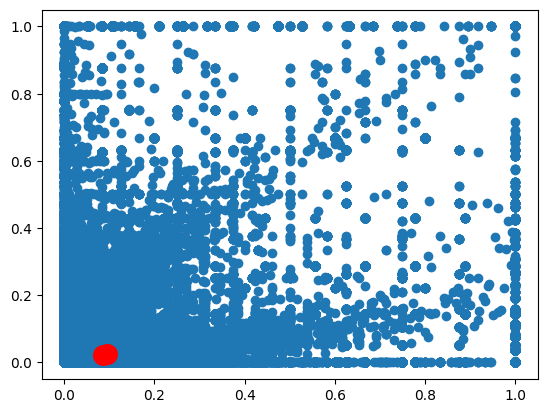

In [250]:
# Plot the data
plt.scatter(x[:,0], 
            x[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [251]:
y_pred = kmeans.predict(X_test)

In [252]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 501 1554]
 [ 119  292]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.24      0.37      2055
         1.0       0.16      0.71      0.26       411

    accuracy                           0.32      2466
   macro avg       0.48      0.48      0.32      2466
weighted avg       0.70      0.32      0.36      2466



In [253]:
accuracy_kmeans1 = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy_kmeans1)

Validation Accuracy: 0.321573398215734


# KNN

In [254]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [255]:
y_pred = neigh.predict(X_test)

In [256]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2053    2]
 [ 386   25]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2055
         1.0       0.93      0.06      0.11       411

    accuracy                           0.84      2466
   macro avg       0.88      0.53      0.51      2466
weighted avg       0.86      0.84      0.78      2466



In [257]:
accuracy_knn1 = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy_knn1)

Validation Accuracy: 0.8426601784266018


# XGB 1

In [287]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(max_depth= 3, n_estimators= 150, random_state= 0,  learning_rate= 0.03, n_jobs=10)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [288]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      2055
         1.0       0.74      0.53      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [290]:
accuracy_xgb1 = accuracy_score(y_test, pred_xgb)
print("Validation Accuracy:", accuracy_xgb1)

Validation Accuracy: 0.8909164639091647


# Correlation

In [261]:
corr_df = df.corr()
corr_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601482,0.377837,0.255840,0.443140,0.373659,-0.223625,-0.316562,0.099008,-0.094796,0.048539,-0.006369,-0.025062,-0.005476,-0.033650,-0.025849,0.026453,0.138919
Administrative_Duration,0.601482,1.000000,0.297946,0.238031,0.279483,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.377837,0.297946,1.000000,0.616426,0.374247,0.379607,-0.116915,-0.164758,0.049218,-0.048460,0.019737,-0.009531,-0.038447,-0.028904,-0.036125,0.056077,0.035196,0.096277
Informational_Duration,0.255840,0.238031,0.616426,1.000000,0.272128,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.443140,0.279483,0.374247,0.272128,1.000000,0.834193,-0.221475,-0.316035,0.064051,-0.024098,0.073249,0.004085,-0.013268,-0.039416,-0.049221,0.134659,0.015993,0.168129
ProductRelated_Duration,0.373659,0.355422,0.379607,0.347364,0.834193,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223625,-0.144170,-0.116915,-0.074067,-0.221475,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316562,-0.205798,-0.164758,-0.105276,-0.316035,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.099008,0.067608,0.049218,0.030861,0.064051,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094796,-0.073304,-0.048460,-0.030577,-0.024098,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


<Axes: >

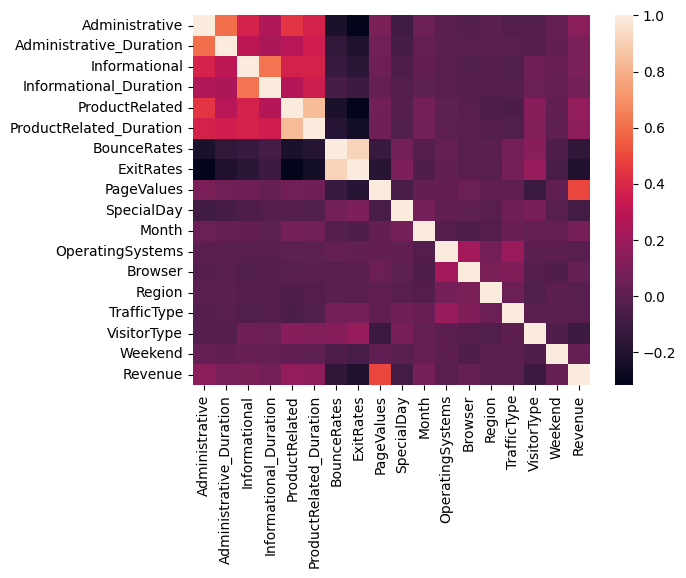

In [262]:
sns.heatmap(df.corr())

In [263]:
corr_df["Revenue"]

Administrative             0.138919
Administrative_Duration    0.093587
Informational              0.096277
Informational_Duration     0.070345
ProductRelated             0.168129
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
Month                      0.080150
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
VisitorType               -0.104726
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

In [264]:
weak_corr_df = corr_df[(corr_df["Revenue"] < 0.2) & (corr_df["Revenue"] > -0.2)]
weak_corr_df["Revenue"]

Administrative             0.138919
Administrative_Duration    0.093587
Informational              0.096277
Informational_Duration     0.070345
ProductRelated             0.168129
ProductRelated_Duration    0.152373
BounceRates               -0.150673
SpecialDay                -0.082305
Month                      0.080150
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
VisitorType               -0.104726
Weekend                    0.029295
Name: Revenue, dtype: float64

# Feature Selection

In [265]:
high_corr_df = df.copy()
for column in df.columns:
  if column in weak_corr_df.index:
    high_corr_df = high_corr_df.drop(column, axis=1)
  else:
    continue
high_corr_df.corr()["Revenue"]

ExitRates    -0.207071
PageValues    0.492569
Revenue       1.000000
Name: Revenue, dtype: float64

<Axes: >

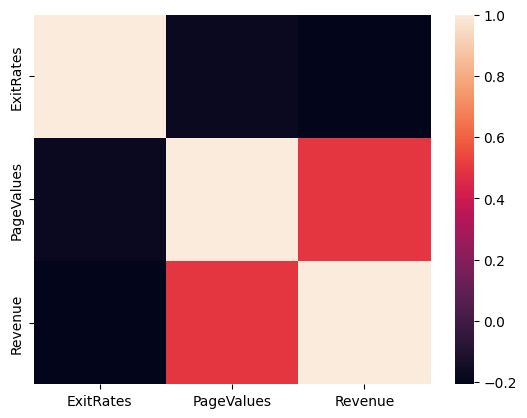

In [266]:
sns.heatmap(high_corr_df.corr())

# Prepare Data

In [267]:
from sklearn.model_selection import train_test_split
X = high_corr_df.drop('Revenue', axis=1)
y = high_corr_df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kmeans 2

In [268]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train, y_train)
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [269]:
x = np.array(high_corr_df.drop('Revenue', axis=1)).reshape(-1, 2)
print(x.shape)

(12330, 2)


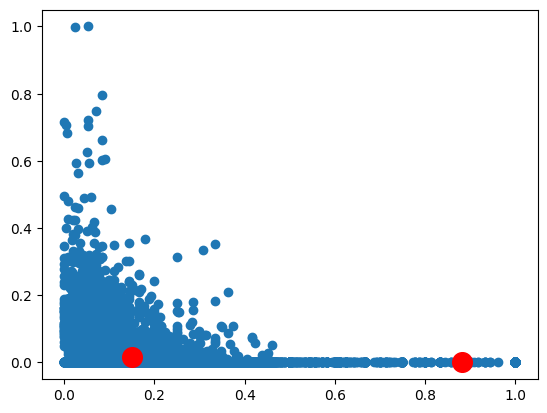

In [270]:
# Plot the data
plt.scatter(x[:,0], 
            x[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [271]:
y_pred = kmeans.predict(X_test)

In [272]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1812  243]
 [ 411    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      2055
         1.0       0.00      0.00      0.00       411

    accuracy                           0.73      2466
   macro avg       0.41      0.44      0.42      2466
weighted avg       0.68      0.73      0.71      2466



In [273]:
accuracy_kmeans2 = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy_kmeans2)

Validation Accuracy: 0.7347931873479319


# KNN 2

In [274]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [275]:
y_pred = neigh.predict(X_test)

In [276]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1971   84]
 [ 203  208]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      2055
         1.0       0.71      0.51      0.59       411

    accuracy                           0.88      2466
   macro avg       0.81      0.73      0.76      2466
weighted avg       0.87      0.88      0.88      2466



In [277]:
accuracy_knn2 = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy_knn2)

Validation Accuracy: 0.883617193836172


# XGP 2

In [282]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(max_depth= 3, n_estimators= 150, random_state= 0,  learning_rate= 0.03, n_jobs=10)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [283]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2055
         1.0       0.70      0.53      0.61       411

    accuracy                           0.88      2466
   macro avg       0.81      0.74      0.77      2466
weighted avg       0.88      0.88      0.88      2466



In [284]:
accuracy_xgb2 = accuracy_score(y_test, pred_xgb)
print("Validation Accuracy:", accuracy_xgb2)

Validation Accuracy: 0.8844282238442822


## Results  
The model can predict if the active cutomer will place an order or not based on them session data with 89% accuracy.

,Model,Accuracy_score
2,XGB_1,0.890916
5,XGB_2,0.884428
4,KNN_2,0.883617
1,KNN_1,0.842660
3,KMeans_2,0.734793
0,KMeans_1,0.321573


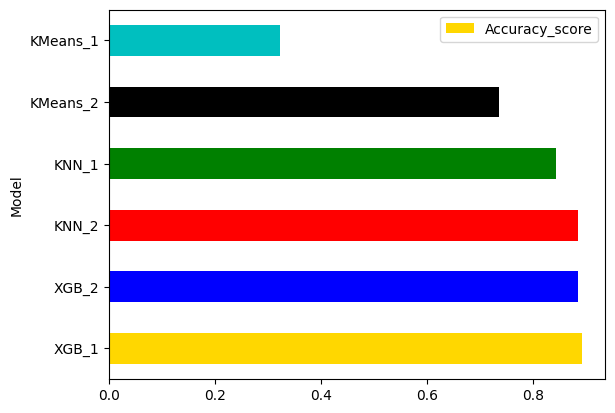

In [297]:
from itertools import cycle, islice
models = pd.DataFrame({
    'Model':['KMeans_1', 'KNN_1', "XGB_1", 'KMeans_2', 'KNN_2', "XGB_2"],
    'Accuracy_score' :[accuracy_kmeans1, accuracy_knn1, accuracy_xgb1, accuracy_kmeans2, accuracy_knn2, accuracy_xgb2]
})
my_colors = list(islice(cycle(['gold', 'b', 'r', 'g', 'k', 'c']), None, len(models)))
models = models.sort_values(by='Accuracy_score', ascending=False)
models.plot.barh(x='Model', y='Accuracy_score', color= my_colors)
models